In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
titanic = pd.read_csv("data/titanic.csv")

In [2]:

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info() # Survived와 PClass 변수가 범주형 int64로 잘못 되어있으므로 형변환을 합니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic['Survived'] = titanic['Survived'].astype(object)
titanic['Pclass'] = titanic['Pclass'].astype(object)

In [5]:
titanic.isnull().sum() # Cabin 변수가  687 행이 missing이고 Embarked가 2개의 행이 missing인 것을 확인하

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
missing_df = titanic.isnull().sum().reset_index()
missing_df.columns = ['column', 'count']
missing_df['ratio'] = missing_df['count'] / titanic.shape[0]
missing_df.loc[missing_df['ratio'] != 0]

,column,count,ratio
10,Cabin,687,0.771044
11,Embarked,2,0.002245


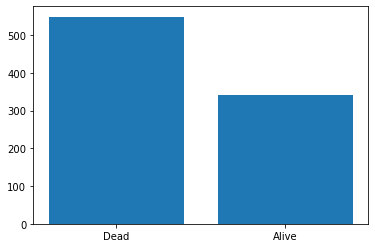

In [8]:
plt.bar((0, 1), titanic['Survived'].value_counts())
plt.xticks((0, 1), ('Dead','Alive'))

#titanic['Survived'].value_counts().plot(kind='bar')

plt.show()

In [9]:
# for col in titanic.columns :
#     if titanic[col].dtypes == "object":
#         print(col)

category_feature = [ col for col in titanic.columns if titanic[col].dtypes == "object"]
category_feature

['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [10]:
# 데이터의 기본키(인덱스), 종속변수 등을 제외
category_feature = list(set(category_feature) - set(['PassengerId','Survived'])) 

category_feature

['Pclass', 'Ticket', 'Embarked', 'Sex', 'Name', 'Cabin']

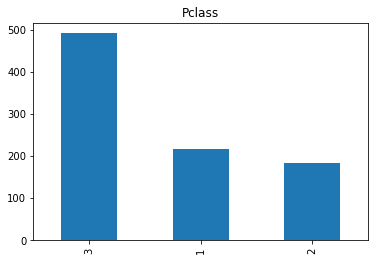

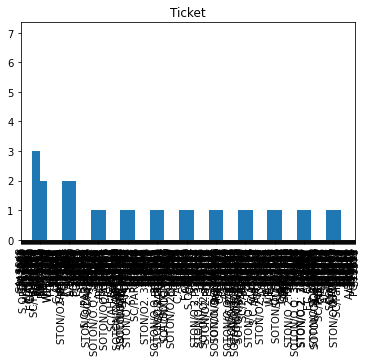

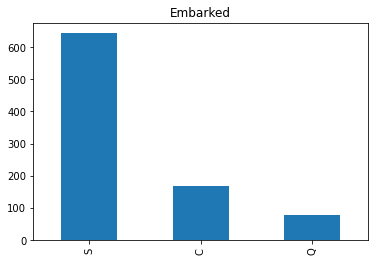

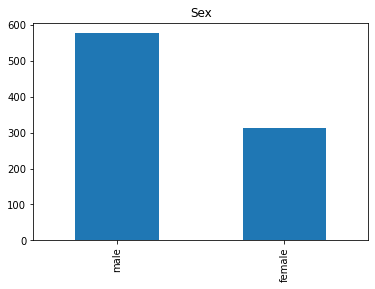

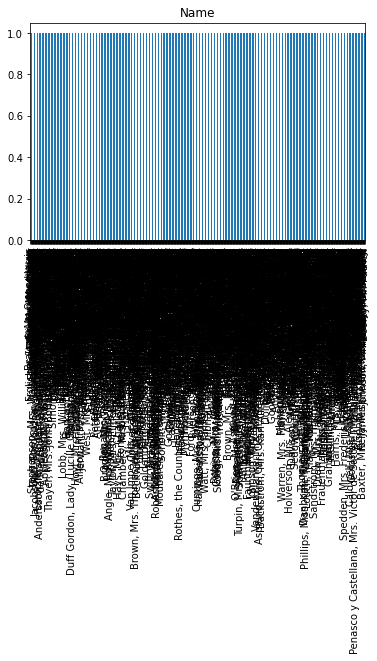

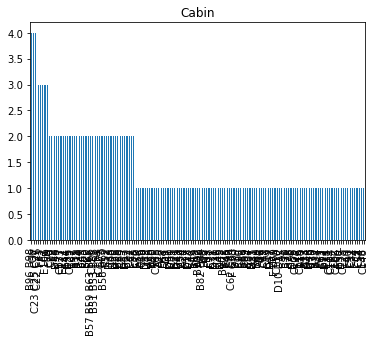

In [11]:
for col in category_feature: 
    titanic[col].value_counts().plot(kind='bar') 

    plt.title(col)
    plt.show()

In [12]:
def bar_chart(feature):
    alive = titanic[titanic['Survived']==1][feature].value_counts()
    dead = titanic[titanic['Survived']==0][feature].value_counts()
    df = pd.DataFrame([alive, dead])
    df.index = ['Alive','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

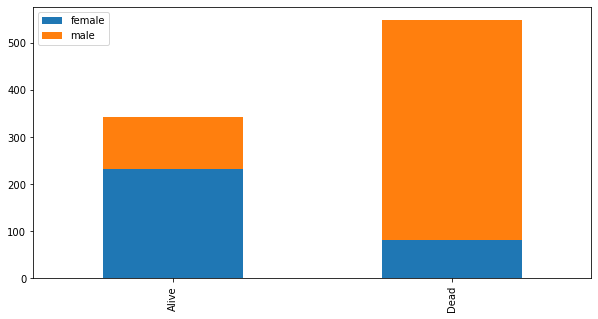

In [13]:
bar_chart('Sex')

# 차트는 여성이 남성보다 생존할 가능성이 더 높다는 것을 확인시켜 준다

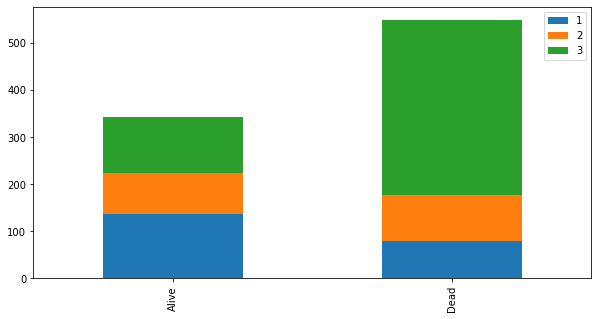

In [14]:
bar_chart('Pclass')

# 차트는 1등급 클래스가 다른 클래스보다 생존할 가능성이 더 높다는 것을 확인시켜 준다
# 차트는 3등급 클래스가 다른 클래스보다 죽을 가능성이 더 높다는 것을 확인시켜 준다

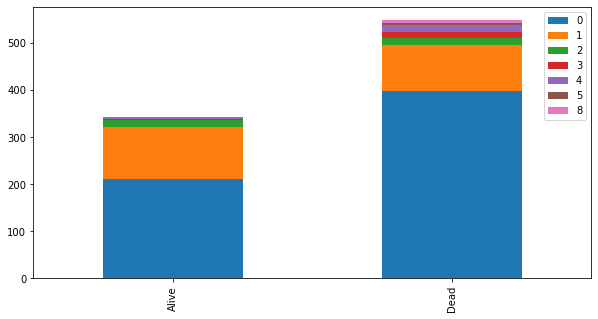

In [15]:
bar_chart('SibSp')

# 차트는 혼자인 사람보다 형제나 배우자가 있는 사람들이 생존할 가능성이 더 높다는 것을 확인시켜 준다

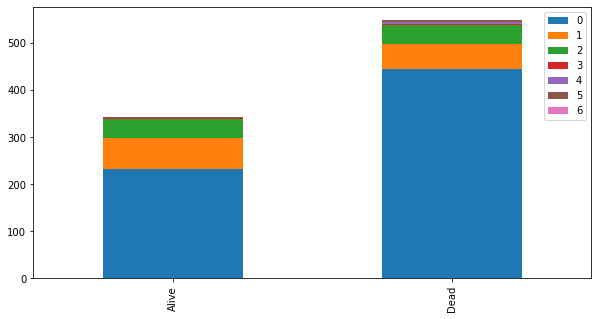

In [16]:
bar_chart('Parch')

# 차트는 혼자인 사람보다 부모나 자식이 있는 사람들이 생존할 가능성이 더 높다는 것을 확인시켜 준다

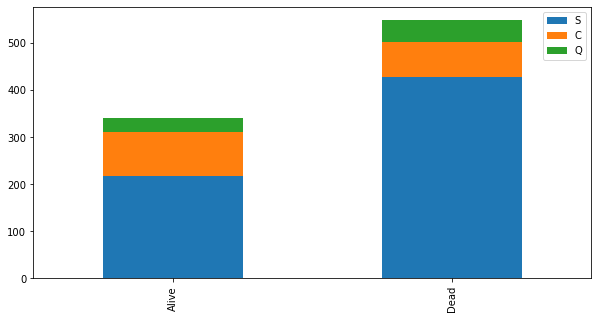

In [17]:
bar_chart('Embarked')

# C 선착장 탑승자의 경우 생존자가 더 많지만 다른 선착장 탑승자는 죽은 사람이 더 많을 가능성을 보여준다